In [1]:
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('obsmat.txt', sep='  ', header=None, names=['frame_number', 'pedestrian_ID', 'pos_x', 'pos_z', 'pos_y', 'v_x', 'v_z', 'v_y'])

In [3]:
groups=pd.read_csv('groups.txt',sep=' ', names=['a','b','c','d','e','f'])

In [4]:


data['group_size'] = 0
data['group_number'] = 0

In [5]:
groups['a']=groups['a'].astype(float)
groups['b']=groups['b'].astype(float)
groups['group_size'] =  groups.apply(lambda x: 6 - (x.isnull().sum()), axis='columns')
groups['group_number'] = range(1,len(groups)+1)

In [6]:
groups.head()

,a,b,c,d,e,f,group_size,group_number
0,5.0,4.0,NaN,NaN,NaN,NaN,2,1
1,6.0,3.0,2.0,NaN,NaN,NaN,3,2
2,13.0,11.0,12.0,NaN,NaN,NaN,3,3
3,16.0,15.0,14.0,17.0,18.0,20.0,6,4
4,28.0,29.0,NaN,NaN,NaN,NaN,2,5


In [7]:
for i in range(len(data)):
    for j in range(len(groups)):
        if data.pedestrian_ID[i] == groups.a[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.b[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.c[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.d[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.e[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.f[j]:
            data['group_size'][i] = groups['group_size'][j]

            
for i in range(len(data)):
    for j in range(len(groups)):
        if data.pedestrian_ID[i] == groups.a[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.b[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.c[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.d[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.e[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.f[j]:
            data['group_number'][i] = groups['group_number'][j]
            

In [8]:
data = data.drop(['pos_z', 'v_z'], axis=1)

In [9]:
frames = []
for i in range(1,368):
    x = len(data[data['pedestrian_ID'] == i])
    frames.append(x)

In [10]:
avg = sum(frames)/len(frames)
avg

24.272479564032697

In [11]:
frameslist = data['frame_number'].unique().tolist()

In [12]:

def divide_chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [13]:
x = list(divide_chunks(frameslist, 48))

In [14]:
list_of_group_numbers = []
for i in range(len(x)):
    chunked_dataset = data[data['frame_number'].isin(x[i])]
    list_of_group_numbers.append(chunked_dataset[chunked_dataset['group_number'] != 0]['group_number'].unique().tolist() + len(chunked_dataset[chunked_dataset['group_number'] == 0]['pedestrian_ID'].unique().tolist()) * [0])

In [15]:
list_of_group_numbers

[[2, 1, 3, 0, 0, 0, 0, 0],
 [3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [7, 0, 0, 0, 0, 0, 0, 0],
 [8, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [9, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [11, 12, 0, 0, 0, 0, 0, 0, 0],
 [13, 14, 0, 0, 0, 0, 0, 0, 0, 0],
 [13, 14, 15, 16, 18, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [16, 18, 17, 0, 0, 0, 0, 0, 0, 0, 0],
 [19, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [20, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [21, 22, 23, 0, 0, 0, 0, 0, 0, 0, 0],
 [23, 24, 25, 0, 0, 0, 0, 0, 0, 0, 0],
 [25, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [26, 28, 27, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [28, 27, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [31, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [31, 30, 32, 33, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [33, 34, 35, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [35, 38, 36, 37, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [38, 36, 37, 39, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [40

In [16]:
groups.loc[groups['group_number'] == 3].group_size

2    3
Name: group_size, dtype: int64

In [17]:
import itertools
merged = list(itertools.chain(*list_of_group_numbers))
print(merged)
#plt.hist(merged)
for i in range(len(merged)):
    if merged[i] != 0:
        for j in groups['group_number']:
            if j == merged[i]:
                merged[i] = groups[groups['group_number'] == j]['group_size'].item()

[2, 1, 3, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 8, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 12, 0, 0, 0, 0, 0, 0, 0, 13, 14, 0, 0, 0, 0, 0, 0, 0, 0, 13, 14, 15, 16, 18, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 18, 17, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 22, 23, 0, 0, 0, 0, 0, 0, 0, 0, 23, 24, 25, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 28, 27, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 27, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 31, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 31, 30, 32, 33, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 34, 35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 35, 38, 36, 37, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 38, 36, 37, 39, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 37, 41, 43, 42, 44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [18]:
print(merged)

[3, 3, 3, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 4, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 2, 6, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 2, 4, 4, 2, 2, 4, 2, 2, 

In [19]:
data['pedestrian_ID'].unique()

array([  1.,   2.,   3.,   5.,   4.,   6.,   7.,   8.,   9.,  10.,  12.,
        11.,  13.,  14.,  15.,  16.,  17.,  18.,  20.,  21.,  22.,  25.,
        23.,  24.,  26.,  27.,  28.,  29.,  30.,  31.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  44.,  43.,  45.,  46.,
        47.,  48.,  49.,  54.,  53.,  50.,  55.,  57.,  56.,  51.,  52.,
        58.,  59.,  60.,  61.,  62.,  63.,  67.,  66.,  65.,  64.,  68.,
        69.,  72.,  73.,  70.,  71.,  76.,  75.,  74.,  78.,  77.,  79.,
        80.,  81.,  82.,  83.,  85.,  84.,  86.,  87.,  90.,  89.,  88.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  99.,  98., 100., 101.,
       108., 103., 104., 105., 106., 107., 109., 110., 111., 112., 113.,
       114., 115., 116., 117., 118., 119., 120., 122., 121., 123., 124.,
       125., 126., 127., 128., 129., 130., 131., 132., 133., 134., 135.,
       136., 137., 138., 139., 140., 141., 142., 143., 144., 145., 146.,
       147., 148., 149., 150., 151., 152., 155., 15

(array([308.,   0.,  60.,  18.,  12.,   6.,   3.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

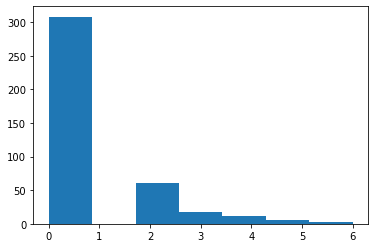

In [20]:
plt.hist(merged, bins = 7)

In [21]:
list_of_groups_as_zeros = copy.deepcopy(list_of_group_numbers)

In [22]:
for i in range(len(list_of_groups_as_zeros)):
    for j in range(len(list_of_groups_as_zeros[i])):
        if list_of_groups_as_zeros[i][j] != 0:
            list_of_groups_as_zeros[i][j] = groups.loc[groups['group_number'] == list_of_groups_as_zeros[i][j]]['group_size'].item()*[0]
        else:
            list_of_groups_as_zeros[i][j] = [0]
    list_of_groups_as_zeros[i] = list(itertools.chain(*list_of_groups_as_zeros[i]))

In [23]:
list_of_group_numbers

[[2, 1, 3, 0, 0, 0, 0, 0],
 [3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [7, 0, 0, 0, 0, 0, 0, 0],
 [8, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [9, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [11, 12, 0, 0, 0, 0, 0, 0, 0],
 [13, 14, 0, 0, 0, 0, 0, 0, 0, 0],
 [13, 14, 15, 16, 18, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [16, 18, 17, 0, 0, 0, 0, 0, 0, 0, 0],
 [19, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [20, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [21, 22, 23, 0, 0, 0, 0, 0, 0, 0, 0],
 [23, 24, 25, 0, 0, 0, 0, 0, 0, 0, 0],
 [25, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [26, 28, 27, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [28, 27, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [31, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [31, 30, 32, 33, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [33, 34, 35, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [35, 38, 36, 37, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [38, 36, 37, 39, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [40

In [24]:
list_of_groups_as_zeros

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0

In [25]:
list_of_groupsas2 = copy.deepcopy(list_of_group_numbers)

In [26]:
for i in range(len(list_of_groupsas2)):
    for j in range(len(list_of_groupsas2[i])):
        if list_of_groupsas2[i][j] != 0:
            list_of_groupsas2[i][j] = [0,0]
        else:
            list_of_groupsas2[i][j] = [0]
    list_of_groupsas2[i] = list(itertools.chain(*list_of_groupsas2[i]))

In [27]:
length_ind = []
length_group_and_ind = []
length_groupas2_and_ind = []
for i in range(len(list_of_groups_as_zeros)):
    length_ind.append(len(list_of_groups_as_zeros[i]))
for i in range(len(list_of_group_numbers)):
    length_group_and_ind.append(len(list_of_group_numbers[i]))
for i in range(len(list_of_groupsas2)):
    length_groupas2_and_ind.append(len(list_of_groupsas2[i]))
            

In [28]:
def square(list):
    return [i ** 2 for i in list]

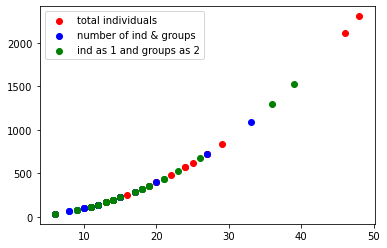

In [29]:
plt.scatter(length_ind,square(length_ind), color ='r', label='total individuals')
plt.scatter(length_group_and_ind,square(length_group_and_ind), color ='b', label='number of ind & groups')
plt.scatter(length_groupas2_and_ind,square(length_groupas2_and_ind), color ='g', label='ind as 1 and groups as 2')
plt.legend()


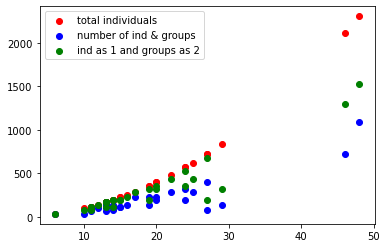

In [30]:
plt.scatter(length_ind,square(length_ind), color ='r', label='total individuals')
plt.scatter(length_ind,square(length_group_and_ind), color ='b', label='number of ind & groups')
plt.scatter(length_ind,square(length_groupas2_and_ind), color ='g', label='ind as 1 and groups as 2')
plt.legend()


In [31]:
from scipy.optimize import curve_fit

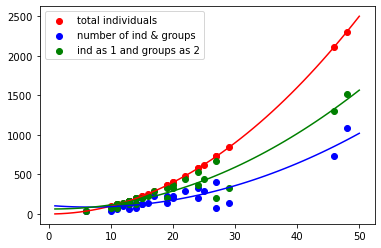

In [32]:
model1 = np.poly1d(np.polyfit(length_ind, square(length_ind), 2))
model2 = np.poly1d(np.polyfit(length_ind, square(length_group_and_ind), 2))
model3 = np.poly1d(np.polyfit(length_ind, square(length_groupas2_and_ind), 2))
polyline = np.linspace(1, 50, 50)
plt.plot(polyline, model1(polyline), color='red')
plt.plot(polyline, model2(polyline), color='blue')
plt.plot(polyline, model3(polyline), color='green')
plt.scatter(length_ind,square(length_ind), color ='r', label='total individuals')
plt.scatter(length_ind,square(length_group_and_ind), color ='b', label='number of ind & groups')
plt.scatter(length_ind,square(length_groupas2_and_ind), color ='g', label='ind as 1 and groups as 2')
plt.legend()


total individuals
y = -0.00000 * x + 1.00000 * x^2 + -0.00000
number of ind & groups
y = -6.56814 * x + 0.49574 * x^2 + 109.10951
ind as 1 and groups as 2
y = -1.13224 * x + 0.62323 * x^2 + 64.15120


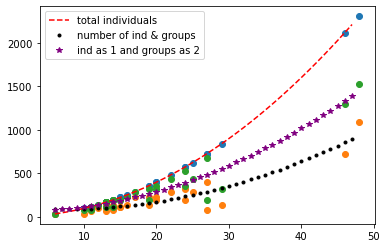

In [33]:
def objective(x, a, b, c):
    return a * x + b * x**2 + c
popt1, _ = curve_fit(objective, length_ind, square(length_ind))
a1, b1, c1 = popt1
print('total individuals')
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a1, b1, c1))
plt.scatter(length_ind,  square(length_ind))
popt2, _2 = curve_fit(objective, length_ind, square(length_group_and_ind))
a2, b2, c2 = popt2
print('number of ind & groups')
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a2, b2, c2))
plt.scatter(length_ind,  square(length_group_and_ind))
popt3, _3 = curve_fit(objective, length_ind, square(length_groupas2_and_ind))
a3, b3, c3 = popt3
print('ind as 1 and groups as 2')
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a3, b3, c3))
plt.scatter(length_ind,  square(length_groupas2_and_ind))
x_line = np.arange(min(length_ind), max(length_ind), 1)
# calculate the output for the range
y_line1 = objective(x_line, a1, b1, c1)
y_line2 = objective(x_line, a2, b2, c2)
y_line3 = objective(x_line, a3, b3, c3)
# create a line plot for the mapping function
plt.plot(x_line, y_line1, '--', color='red', label='total individuals')
plt.plot(x_line, y_line2, '.', color='black', label='number of ind & groups')
plt.plot(x_line, y_line3, '*', color='purple', label='ind as 1 and groups as 2')
plt.legend()
plt.show()

In [34]:
len(length_ind)

31

total individuals
y = -20.78420 * x + 2.81265 * x^2 + 139.56582
number of ind & groups
y = -0.00000 * x + 1.00000 * x^2 + -0.00000
ind as 1 and groups as 2
y = 11.76349 * x + 1.21008 * x^2 + -84.36050


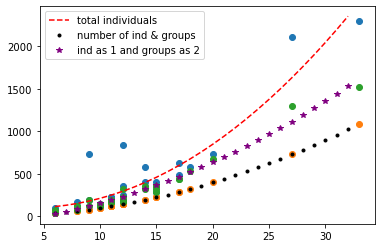

In [35]:
def objective(x, a, b, c):
    return a * x + b * x**2 + c
popt1, _ = curve_fit(objective, length_group_and_ind, square(length_ind))
a1, b1, c1 = popt1
print('total individuals')
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a1, b1, c1))
plt.scatter(length_group_and_ind,  square(length_ind))
popt2, _2 = curve_fit(objective, length_group_and_ind, square(length_group_and_ind))
a2, b2, c2 = popt2
print('number of ind & groups')
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a2, b2, c2))
plt.scatter(length_group_and_ind,  square(length_group_and_ind))
popt3, _3 = curve_fit(objective, length_group_and_ind, square(length_groupas2_and_ind))
a3, b3, c3 = popt3
print('ind as 1 and groups as 2')
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a3, b3, c3))
plt.scatter(length_group_and_ind,  square(length_groupas2_and_ind))
x_line = np.arange(min(length_group_and_ind), max(length_group_and_ind), 1)
# calculate the output for the range
y_line1 = objective(x_line, a1, b1, c1)
y_line2 = objective(x_line, a2, b2, c2)
y_line3 = objective(x_line, a3, b3, c3)
# create a line plot for the mapping function
plt.plot(x_line, y_line1, '--', color='red', label='total individuals')
plt.plot(x_line, y_line2, '.', color='black', label='number of ind & groups')
plt.plot(x_line, y_line3, '*', color='purple', label='ind as 1 and groups as 2')
plt.legend()
plt.show()

total individuals
y = -19.59198 * x + 1.95145 * x^2 + 141.34875
number of ind & groups
y = -6.61668 * x + 0.78306 * x^2 + 63.77023
ind as 1 and groups as 2
y = -0.00000 * x + 1.00000 * x^2 + -0.00000


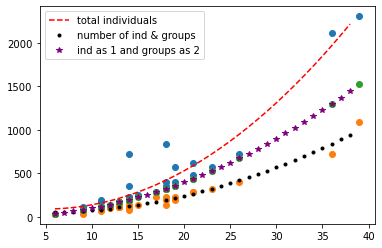

In [36]:
def objective(x, a, b, c):
    return a * x + b * x**2 + c
popt1, _ = curve_fit(objective, length_groupas2_and_ind, square(length_ind))
a1, b1, c1 = popt1
print('total individuals')
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a1, b1, c1))
plt.scatter(length_groupas2_and_ind,  square(length_ind))
popt2, _2 = curve_fit(objective, length_groupas2_and_ind, square(length_group_and_ind))
a2, b2, c2 = popt2
print('number of ind & groups')
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a2, b2, c2))
plt.scatter(length_groupas2_and_ind,  square(length_group_and_ind))
popt3, _3 = curve_fit(objective, length_groupas2_and_ind, square(length_groupas2_and_ind))
a3, b3, c3 = popt3
print('ind as 1 and groups as 2')
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a3, b3, c3))
plt.scatter(length_groupas2_and_ind,  square(length_groupas2_and_ind))
x_line = np.arange(min(length_groupas2_and_ind), max(length_groupas2_and_ind), 1)
# calculate the output for the range
y_line1 = objective(x_line, a1, b1, c1)
y_line2 = objective(x_line, a2, b2, c2)
y_line3 = objective(x_line, a3, b3, c3)
# create a line plot for the mapping function
plt.plot(x_line, y_line1, '--', color='red', label='total individuals')
plt.plot(x_line, y_line2, '.', color='black', label='number of ind & groups')
plt.plot(x_line, y_line3, '*', color='purple', label='ind as 1 and groups as 2')
plt.legend()
plt.show()